In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import re

In [4]:
import string

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [9]:
from sklearn.naive_bayes import MultinomialNB

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.svm import LinearSVC

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
import nltk

In [14]:
from nltk.corpus import stopwords

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
#Load Dataset
df = pd.read_csv("IMDB Dataset.csv")

In [17]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [19]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [20]:
#Convert labels to numeric 
df['label'] = df['sentiment'].map({'negative':0, 'positive':1})
df = df [['review','label']]

In [21]:
#Text Cleaning
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)   # remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['cleaned'] = df['review'].apply(clean_text)


In [22]:
#Train Test Split
X  = df['cleaned']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state  = 42

)

In [23]:
#Count Vectorizer
cv = CountVectorizer(max_features=5000)
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)


In [24]:
#Naive Bayes
nb_cv = MultinomialNB()
nb_cv.fit(X_train_cv, y_train)
y_pred_nb_cv = nb_cv.predict(X_test_cv)

print("Naive Bayes (CV) Accuracy:", accuracy_score(y_test, y_pred_nb_cv))


Naive Bayes (CV) Accuracy: 0.8504


In [25]:
#Logistic Regression
lr_cv = LogisticRegression(max_iter=1000)
lr_cv.fit(X_train_cv, y_train)
y_pred_lr_cv = lr_cv.predict(X_test_cv)

print("Logistic Regression (CV) Accuracy:", accuracy_score(y_test, y_pred_lr_cv))


Logistic Regression (CV) Accuracy: 0.8765


In [26]:
#Support Vector Machine
svm_cv = LinearSVC()
svm_cv.fit(X_train_cv, y_train)
y_pred_svm_cv = svm_cv.predict(X_test_cv)

print("SVM (CV) Accuracy:", accuracy_score(y_test, y_pred_svm_cv))


SVM (CV) Accuracy: 0.8682


In [27]:
#TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [28]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)

lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_lr_tfidf = lr_tfidf.predict(X_test_tfidf)

svm_tfidf = LinearSVC()
svm_tfidf.fit(X_train_tfidf, y_train)
y_pred_svm_tfidf = svm_tfidf.predict(X_test_tfidf)


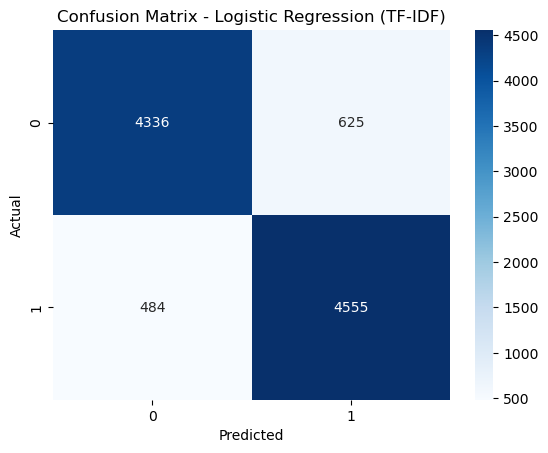

In [29]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr_tfidf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (TF-IDF)")
plt.show()


In [30]:
# Classification Report

In [31]:
print("\nNaive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_cv))
print(confusion_matrix(y_test, y_pred_nb_cv))
print(classification_report(y_test, y_pred_nb_cv))


Naive Bayes
Accuracy: 0.8504
[[4230  731]
 [ 765 4274]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [32]:
print("\nLogistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_cv))
print(confusion_matrix(y_test, y_pred_lr_cv))
print(classification_report(y_test, y_pred_lr_cv))


Logistic Regression
Accuracy: 0.8765
[[4298  663]
 [ 572 4467]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [33]:
print("\nSVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_cv))
print(confusion_matrix(y_test, y_pred_svm_cv))
print(classification_report(y_test, y_pred_svm_cv))


SVM
Accuracy: 0.8682
[[4272  689]
 [ 629 4410]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [34]:
#TF-IDF Results

In [35]:
print("\nNaive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_tfidf))
print(confusion_matrix(y_test, y_pred_nb_tfidf))
print(classification_report(y_test, y_pred_nb_tfidf))


Naive Bayes
Accuracy: 0.8533
[[4208  753]
 [ 714 4325]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [36]:
print("\nLogistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_tfidf))
print(confusion_matrix(y_test, y_pred_lr_tfidf))
print(classification_report(y_test, y_pred_lr_tfidf))


Logistic Regression
Accuracy: 0.8891
[[4336  625]
 [ 484 4555]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [37]:
print("\nSVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_tfidf))
print(confusion_matrix(y_test, y_pred_svm_tfidf))
print(classification_report(y_test, y_pred_svm_tfidf))


SVM
Accuracy: 0.8847
[[4337  624]
 [ 529 4510]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [38]:
#Compare CV vs TF-IDF
results = pd.DataFrame({
    'Model': ['Naive Bayes','Logistic Regression','SVM'],
    'CountVectorizer': [
        accuracy_score(y_test, y_pred_nb_cv),
        accuracy_score(y_test, y_pred_lr_cv),
        accuracy_score(y_test, y_pred_svm_cv)
    ],
    'TF-IDF': [
        accuracy_score(y_test, y_pred_nb_tfidf),
        accuracy_score(y_test, y_pred_lr_tfidf),
        accuracy_score(y_test, y_pred_svm_tfidf)
    ]
})

results


,Model,CountVectorizer,TF-IDF
0,Naive Bayes,0.8504,0.8533
1,Logistic Regression,0.8765,0.8891
2,SVM,0.8682,0.8847


In [39]:
#Top Important Words
feature_names = tfidf.get_feature_names_out()
coefficients = lr_tfidf.coef_[0]

top_positive = np.argsort(coefficients)[-10:]
top_negative = np.argsort(coefficients)[:10]

print("Top Positive Words:")
print([feature_names[i] for i in top_positive])

print("Top Negative Words:")
print([feature_names[i] for i in top_negative])


Top Positive Words:
['loved', 'favorite', 'brilliant', 'amazing', 'wonderful', 'best', 'perfect', '710', 'excellent', 'great']
Top Negative Words:
['worst', 'waste', 'awful', 'bad', 'boring', 'terrible', 'poor', 'nothing', 'dull', 'poorly']
